In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import utils

cifar10_dir = "./data/cifar-10-batches"
X = utils.load_cifar10("./data/cifar-10-batches", unsupervised=True)

n_clusters = 10
scaler = StandardScaler()
pca = PCA(n_components=96)

X_scaled = scaler.fit_transform(X) # 归一化
X_reduced = pca.fit_transform(X_scaled) # PCA降维

gmm = GaussianMixture(n_components=n_clusters, covariance_type='full')
gmm.fit(X_reduced)
labels = gmm.predict(X_reduced)

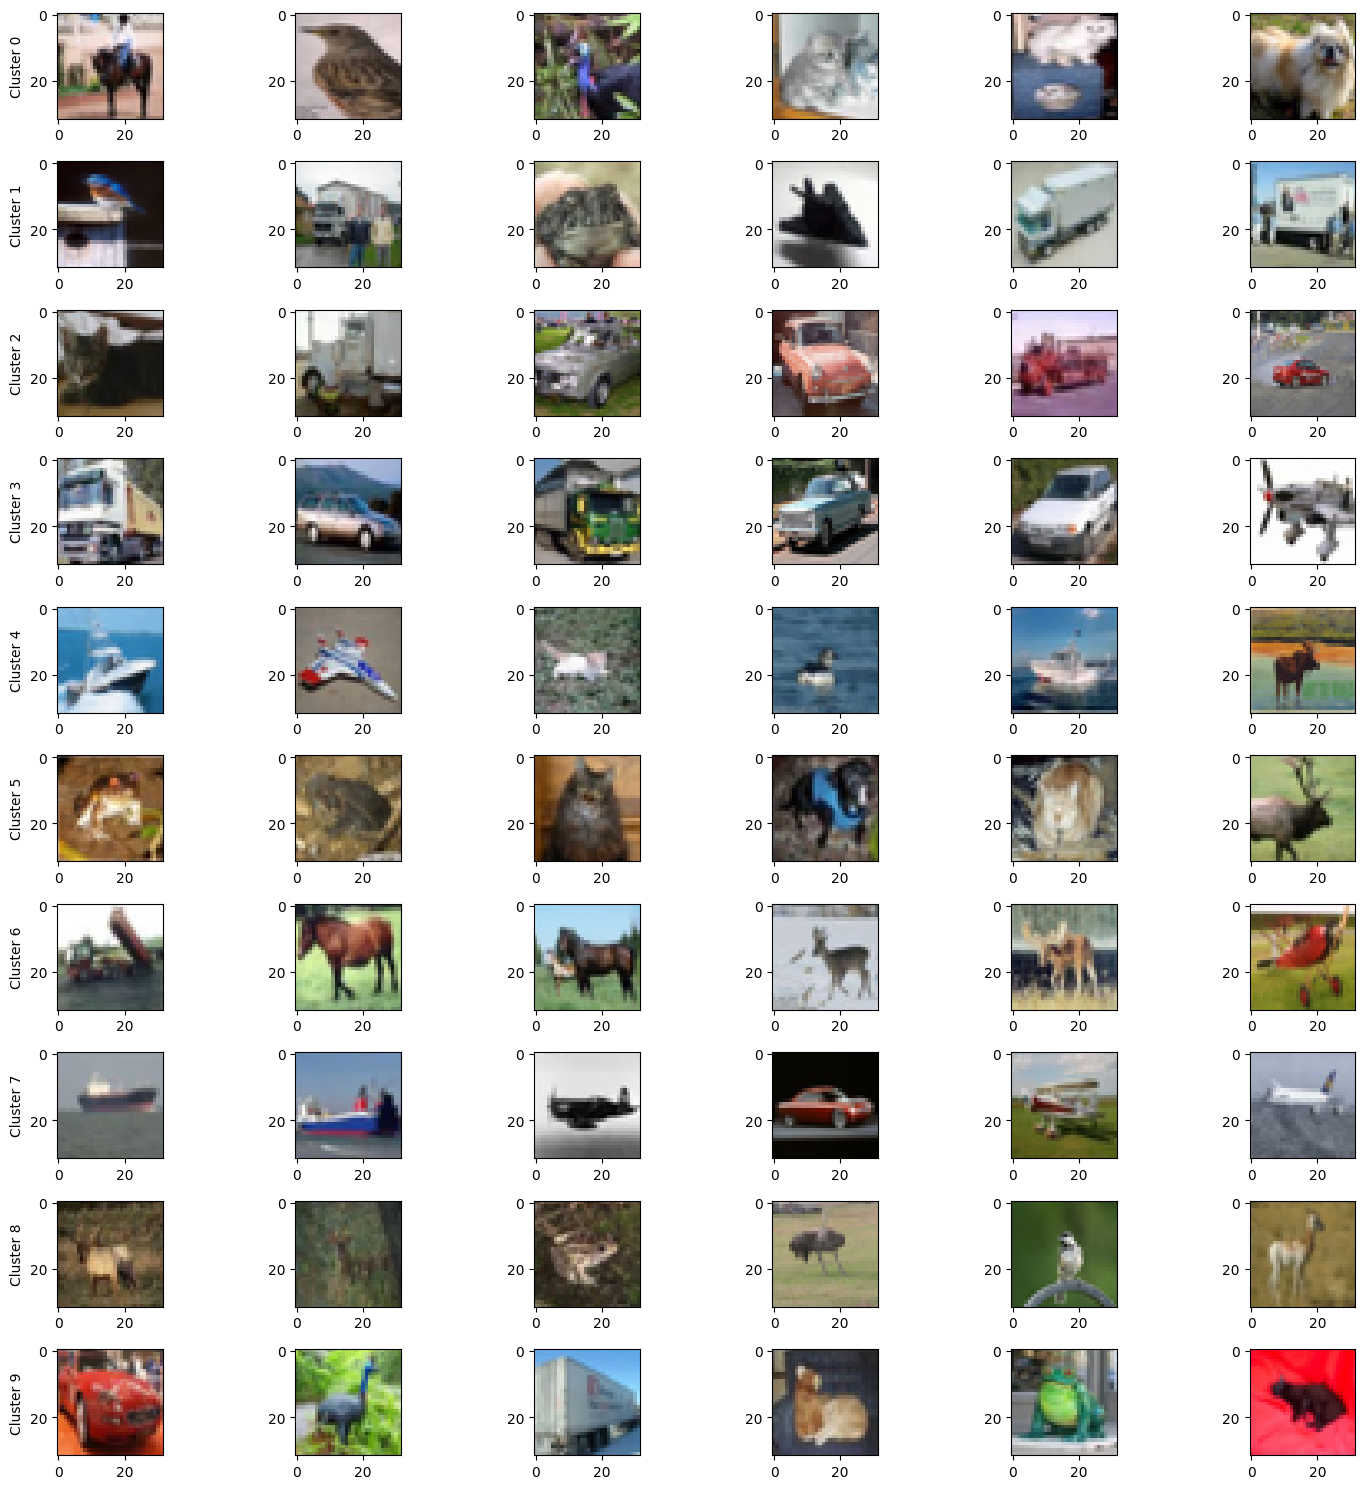

In [ ]:
fig, axes = plt.subplots(n_clusters, 7, figsize=(15, 15))
X = X.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  # 变为三通道图片(10000, 32, 32, 3)
for i in range(n_clusters):
    cluster_images = X[labels == i]
    for j in range(7):
        axes[i, j].imshow(cluster_images[j].astype(np.uint8))
    axes[i, 0].set_ylabel(f"Cluster {i}")
plt.tight_layout()